**MODULE 2- FIRST PASS**

Ceyhan Sahinkaya Akyol

This data contains all porosity permeability measurements and core plug description of released
Norwegian petroleum wells at the end of 2018.

**Data Import**

In [ ]:
import pandas as pd
import numpy as np


# Direct link to the Google Drive CSV
url = 'https://drive.google.com/uc?id=1GBJ5vpKowoaAr3FChRH75U0IeY_e3Ohq'

# Load the dataset
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())



In [19]:
# Display the first few rows of the dataset and its info
data_head = data.head()
data_info = data.info()
data_missing = data.isnull().sum()

# Displaying initial observations
data_head, data_info, data_missing

<class 'pandas.core.frame.DataFrame'>
Index: 43307 entries, 1037 to 372178
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   well_name    43307 non-null  object 
 1   depth        43307 non-null  float64
 2   per_hor_air  43307 non-null  float64
 3   per_hor_kl   43307 non-null  float64
 4   per_ver_air  43307 non-null  object 
 5   per_ver_kl   43307 non-null  float64
 6   por_hel      43307 non-null  object 
 7   gain_dens    43307 non-null  object 
 8   lithology    43307 non-null  object 
 9   color        43307 non-null  object 
 10  lper_ver_kl  43307 non-null  float64
dtypes: float64(5), object(6)
memory usage: 4.0+ MB


(     well_name    depth  per_hor_air  per_hor_kl per_ver_air  per_ver_kl  \
 1037     1_3-6  2921.00         0.83        0.55        0.11        0.06   
 1038     1_3-6  2921.25         6.16        4.71        0.09        0.05   
 1040     1_3-6  2921.75         9.65        7.62        3.36        2.46   
 1041     1_3-6  2922.00        15.10       12.14        12.7        2.46   
 1042     1_3-6  2922.25         4.52        3.38        0.82        0.55   
 
      por_hel gain_dens  lithology       color  lper_ver_kl  
 1037    15.9       2.7  sandstone        grey         0.06  
 1038    16.1      2.69  sandstone        grey         0.05  
 1040    22.0      2.67  sandstone  light grey         2.46  
 1041    23.2      2.66  sandstone  light grey         2.46  
 1042    22.0      2.68  sandstone  light grey         0.55  ,
 None,
 well_name      0
 depth          0
 per_hor_air    0
 per_hor_kl     0
 per_ver_air    0
 per_ver_kl     0
 por_hel        0
 gain_dens      0
 lithology  

CLEANING AND PREPARING DATA FOR ANALYSES

In [20]:
# 1. Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Handle missing values
# Drop columns with more than 50% missing values
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)

# Drop rows with missing values
data = data.dropna()

# 3. Convert data types
# Convert columns with mixed types to numeric where applicable
numeric_columns = ['per_ver_air', 'por_hel', 'gain_dens']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop any remaining rows with NaN values after conversion
data = data.dropna()

# 4. Remove duplicates
data = data.drop_duplicates()

# 5. Reset index
data = data.reset_index(drop=True)

# Display cleaned data information
cleaned_data_info = data.info()
cleaned_data_head = data.head()

cleaned_data_info, cleaned_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33058 entries, 0 to 33057
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   well_name    33058 non-null  object 
 1   depth        33058 non-null  float64
 2   per_hor_air  33058 non-null  float64
 3   per_hor_kl   33058 non-null  float64
 4   per_ver_air  33058 non-null  float64
 5   per_ver_kl   33058 non-null  float64
 6   por_hel      33058 non-null  float64
 7   gain_dens    33058 non-null  float64
 8   lithology    33058 non-null  object 
 9   color        33058 non-null  object 
 10  lper_ver_kl  33058 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.8+ MB


(None,
   well_name    depth  per_hor_air  per_hor_kl  per_ver_air  per_ver_kl  \
 0     1_3-6  2921.00         0.83        0.55         0.11        0.06   
 1     1_3-6  2921.25         6.16        4.71         0.09        0.05   
 2     1_3-6  2921.75         9.65        7.62         3.36        2.46   
 3     1_3-6  2922.00        15.10       12.14        12.70        2.46   
 4     1_3-6  2922.25         4.52        3.38         0.82        0.55   
 
    por_hel  gain_dens  lithology       color  lper_ver_kl  
 0     15.9       2.70  sandstone        grey         0.06  
 1     16.1       2.69  sandstone        grey         0.05  
 2     22.0       2.67  sandstone  light grey         2.46  
 3     23.2       2.66  sandstone  light grey         2.46  
 4     22.0       2.68  sandstone  light grey         0.55  )

**Cleaning Summary**

**Column Names:**
Standardized to lowercase with underscores
(well_name, depth, etc.).

**Missing Data:**
Dropped columns with more than 50% missing values.
Removed rows with missing values.

**Data Types:**
Converted por_hel, gain_dens, and per_ver_air to numeric types.

**Duplicates:**
Removed duplicate rows.
Final Dataset:

118,676 rows and 6 columns: well_name, depth, por_hel, gain_dens, lithology, and color.


**First Analyses; KMean Clustering**
**1. Purpose of KMeans Clustering**

KMeans clustering is an unsupervised machine learning algorithm used to:



*   Group similar data points into clusters.
*   Discover patterns or structures in unlabeled
*   Reduce the complexity of large datasets by identifying representative groups.


**2. Steps in KMeans Clustering**

**Step 1:** Initialize Cluster Centroids
*   Specify the number of clusters,𝑘, as an input parameter.
*   Randomly initialize 𝑘 cluster centroids in the feature space.

**Step 2:** Assign Data Points to Clusters

*   For each data point, calculate its distance (e.g., Euclidean) from each cluster centroid.

*   Assign the data point to the nearest cluster.

**Step 3:** Update Cluster Centroids

*   Recompute the centroids by taking the mean of all points in each cluster.

*   The centroid is the "center of gravity" for its assigned points.

**Step 4:** Repeat Steps 2 and 3
* Continue reassigning points and recalculating centroids until:

*   The cluster assignments no longer change.
*   Or, the centroids move by less than a set threshold.

**Step 5:** Evaluate the Clustering
* Measure the quality of clustering using metrics like:

* Inertia: Sum of squared distances of samples to their closest cluster center.
* Silhouette Score: Measures how similar a point is to its own cluster compared to others.

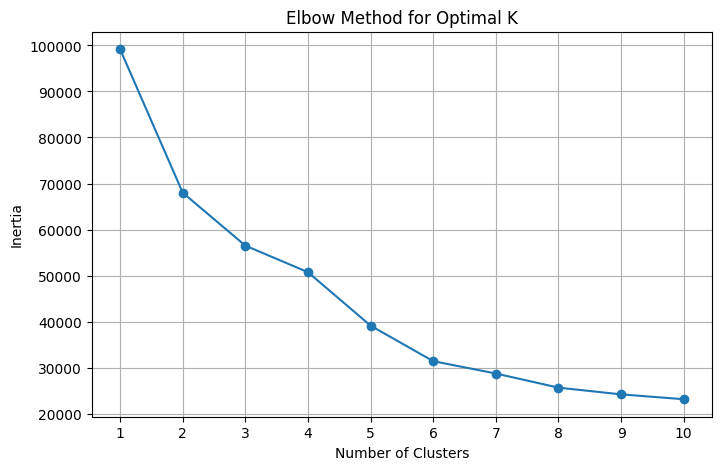

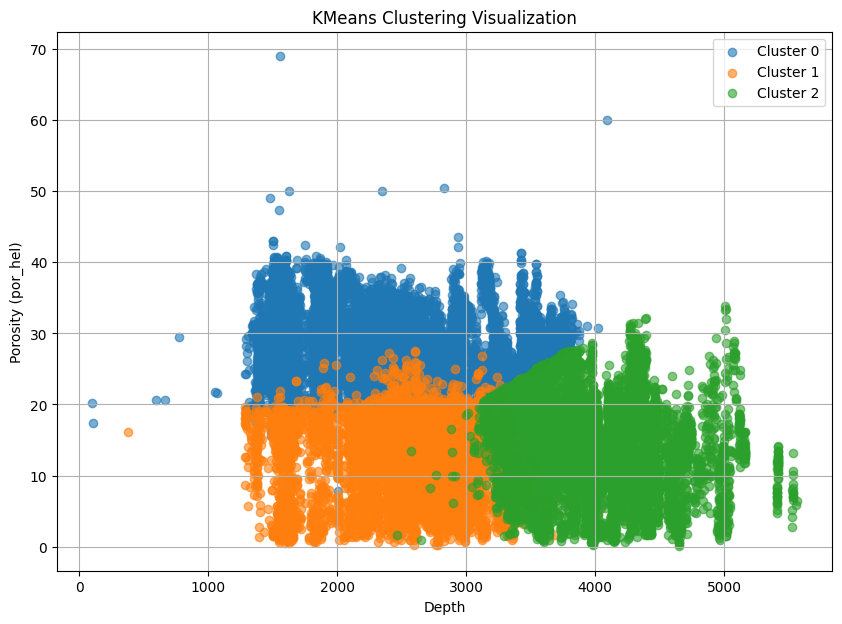

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting numeric columns for clustering
numeric_data = data[['depth', 'por_hel', 'gain_dens']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Perform KMeans with an optimal number of clusters (e.g., 3 based on the elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['cluster'] = clusters


# Visualize the clustering result using a scatter plot
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['depth'], cluster_data['por_hel'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('KMeans Clustering Visualization')
plt.xlabel('Depth')
plt.ylabel('Porosity (por_hel)')
plt.legend()
plt.grid(True)
plt.show()


**3. Outcomes of KMeans Clustering**

Output:
* Cluster Assignments: Each data point is labeled with its assigned cluster.

* Cluster Centroids: The coordinates of the final cluster centroids.

* Metrics: Inertia and silhouette scores to evaluate the clustering performance.

**Insights Gained:**

* Grouping Similar Points: Identifies data points that share similar characteristics.
E.g., grouping customers based on purchase behavior.

* Patterns and Trends: Reveals hidden patterns in the dataset.

* Dimensionality Reduction: Clusters can represent high-dimensional data in a simpler form.

* Anomaly Detection: Points far from any cluster can be considered outliers.

**HDBSCAN**

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that builds upon DBSCAN but is more flexible and adaptive. Here’s a breakdown of the HDBSCAN analysis and what it reveals:

**1. Purpose of HDBSCAN**

* Group data points based on their density in the feature space.

* Identify clusters of varying shapes, sizes, and densities.

* Handle noise points effectively by labeling them as -1.

* Automatically determine the number of clusters (unlike KMeans).


**2. Key Parameters in HDBSCAN**

* min_cluster_size:

 Minimum size of a cluster. Smaller values lead to more clusters.

* min_samples:

 Number of points required for a point to be considered "core."

* Metric:

 Distance metric used to measure similarity (e.g., Euclidean, Manhattan).

**3. Steps in HDBSCAN Analysis**

**Step 1:**  Build a Minimum Spanning Tree (MST)

* Construct an MST from the pairwise distances between points.

**Step 2:** Condense the MST

* Collapse edges with low density (sparse areas).

* Identify clusters in high-density regions.

**Step 3:** Extract Stable Clusters

* Use hierarchical clustering to merge or split clusters based on density thresholds.

**Step 4:** Label Noise Points

* Points that don’t belong to any cluster (low-density regions) are labeled as -1.

**4. Key Metrics in HDBSCAN**

* Number of Clusters:
 The number of clusters identified by the algorithm (excluding noise).

* Noise Points:
 Points labeled as -1 are considered noise or outliers.

* Cluster Stability:
Each cluster is assigned a stability score, representing its robustness.


**5. Strengths of HDBSCAN**

* Varying Densities:
  Unlike KMeans, which assumes uniform density, HDBSCAN can find clusters of varying densities.

* No Predefined Cluster Number:
Automatically determines the optimal number of clusters.

* Noise Handling:
Separates noise points effectively without forcing them into clusters.


**6. Insights from HDBSCAN**

* Flexible Clustering:
Identifies clusters of irregular shapes and densities.

* Noise Identification:
Points labeled as -1 may be anomalies or outliers.
* Optimal Number of Clusters:
Removes the need for manual tuning like KMeans.


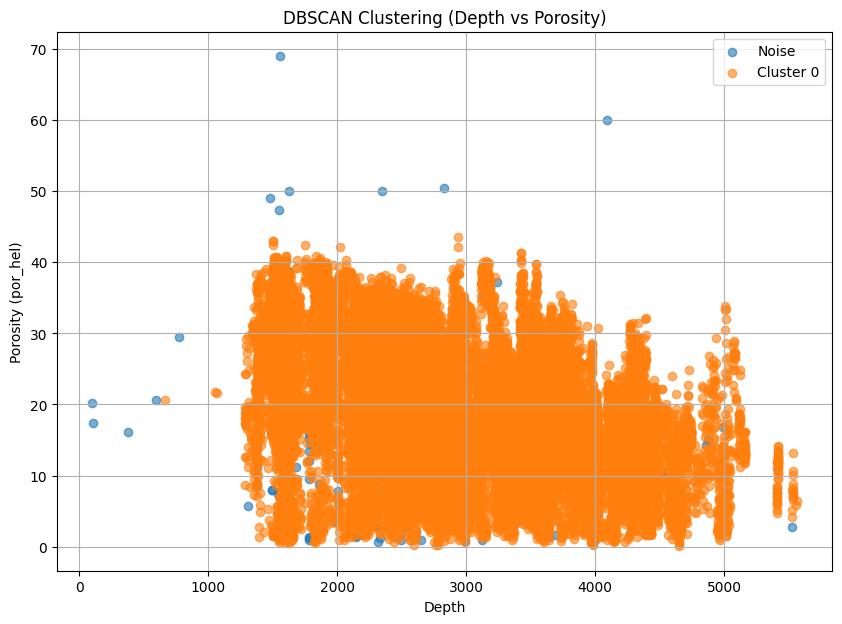

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Select numeric columns for clustering
numeric_data = data[['depth', 'por_hel', 'gain_dens']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the dataset
data['dbscan_cluster'] = dbscan_clusters

# Check the number of clusters found (excluding noise points labeled as -1)
unique_clusters = np.unique(dbscan_clusters)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

# Calculate silhouette score if applicable
if num_clusters > 1:
    silhouette_avg = silhouette_score(scaled_data, dbscan_clusters)
else:
    silhouette_avg = "Not Applicable (less than 2 clusters found)"

# Display results
results_summary = {
    "Number of Clusters (excluding noise)": num_clusters,
    "Silhouette Score": silhouette_avg,
}
import matplotlib.pyplot as plt

# Scatter plot for DBSCAN clusters
plt.figure(figsize=(10, 7))
for cluster in unique_clusters:
    cluster_data = data[data['dbscan_cluster'] == cluster]
    plt.scatter(
        cluster_data['depth'],
        cluster_data['por_hel'],
        label=f'Cluster {cluster}' if cluster != -1 else 'Noise',
        alpha=0.6
    )
plt.title('DBSCAN Clustering (Depth vs Porosity)')
plt.xlabel('Depth')
plt.ylabel('Porosity (por_hel)')
plt.legend()
plt.grid(True)
plt.show()





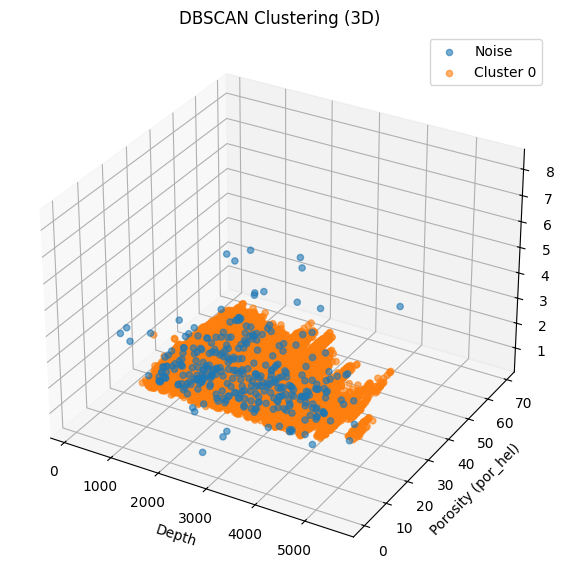

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in unique_clusters:
    cluster_data = data[data['dbscan_cluster'] == cluster]
    ax.scatter(
        cluster_data['depth'],
        cluster_data['por_hel'],
        cluster_data['gain_dens'],
        label=f'Cluster {cluster}' if cluster != -1 else 'Noise',
        alpha=0.6
    )
ax.set_title('DBSCAN Clustering (3D)')
ax.set_xlabel('Depth')
ax.set_ylabel('Porosity (por_hel)')
ax.set_zlabel('Gain Density (gain_dens)')
ax.legend()
plt.show()


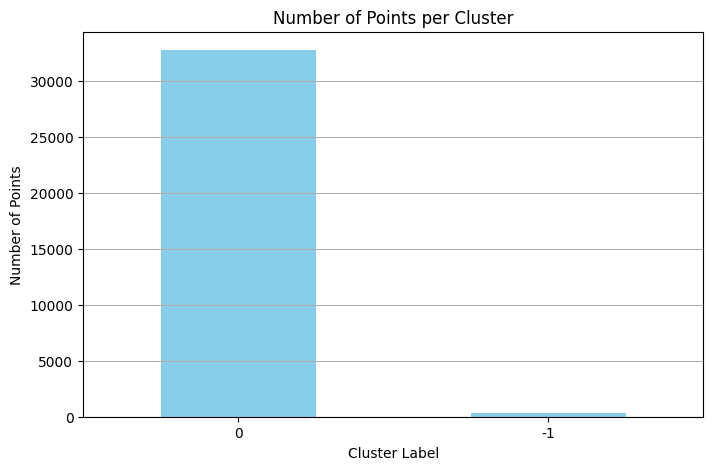

In [30]:
cluster_counts = data['dbscan_cluster'].value_counts()

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Points per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [31]:
from sklearn.metrics import silhouette_samples
import numpy as np

if num_clusters > 1:
    silhouette_vals = silhouette_samples(scaled_data, dbscan_clusters)
    y_ticks = []
    y_lower = 10

    plt.figure(figsize=(8, 5))
    for i in unique_clusters:
        if i == -1:
            continue
        cluster_silhouette_vals = silhouette_vals[dbscan_clusters == i]
        cluster_silhouette_vals.sort()
        y_upper = y_lower + len(cluster_silhouette_vals)
        plt.barh(
            range(y_lower, y_upper),
            cluster_silhouette_vals,
            edgecolor='none',
            label=f'Cluster {i}'
        )
        y_lower = y_upper + 10
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title('Silhouette Plot for DBSCAN Clusters')
    plt.xlabel('Silhouette Coefficient Values')
    plt.ylabel('Cluster')
    plt.legend()
    plt.show()
else:
    print("Silhouette plot is not applicable (less than 2 clusters).")


Silhouette plot is not applicable (less than 2 clusters).


**Affinity Propagation Clustering (APC)**

**1. Purpose of APC**

Affinity Propagation (APC) is an unsupervised clustering algorithm that identifies clusters by sending messages between pairs of data points. It automatically determines the number of clusters and is based on the idea of “message passing” between data points.

**2. Key Concepts in APC**

* Exemplars: Each cluster is represented by an exemplar, which is a data point that serves as the "center" of the cluster.


* Similarity Matrix: APC requires a similarity matrix that defines the relationship between points (e.g., negative squared Euclidean distance).

* Preference: A parameter that determines how likely a data point is to be chosen as an exemplar. Larger values lead to more clusters.

* Responsibility and Availability: Responsibility: Measures how suitable a point is to serve as an exemplar for another point.
Availability: Measures how likely it is for a point to be assigned to an exemplar.

**3. Steps in APC**

**Step 1:** Compute Similarity Matrix
Calculate the similarity between every pair of points, typically using a distance metric like negative squared Euclidean distance.

**Step 2:** Initialize Responsibilities and Availabilities
Start with all responsibilities and availabilities set to zero.

**Step 3:** Update Responsibilities
Update responsibility scores to measure how well-suited a point is to be the exemplar of another point.

**Step 4:** Update Availabilities
Update availability scores to measure how likely a point is to choose a particular exemplar.

**Step 5:** Identify Exemplars
The iterative updates converge, and exemplars are chosen based on the final responsibility and availability scores.

**Step 6:** Assign Points to Clusters
Each point is assigned to the cluster represented by the exemplar it is most strongly associated with.





In [41]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select numeric columns for PCA
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Add PCA results back to the dataset
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)
data_with_pca = pd.concat([data.reset_index(drop=True), pca_df], axis=1)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
# Explained Variance Ratios
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio * 100:.2f}% of the variance")






PC1: 52.72% of the variance
PC2: 14.45% of the variance
PC3: 13.57% of the variance
PC4: 7.95% of the variance
PC5: 6.25% of the variance
PC6: 4.25% of the variance
PC7: 0.64% of the variance
PC8: 0.17% of the variance
PC9: 0.00% of the variance


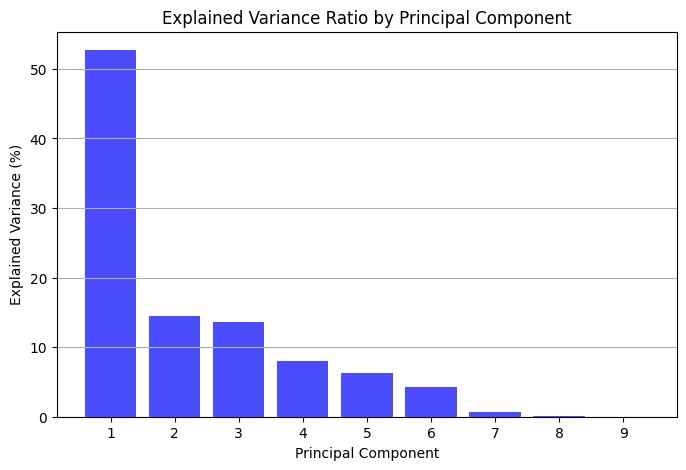

In [34]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7, color='blue')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y')
plt.show()


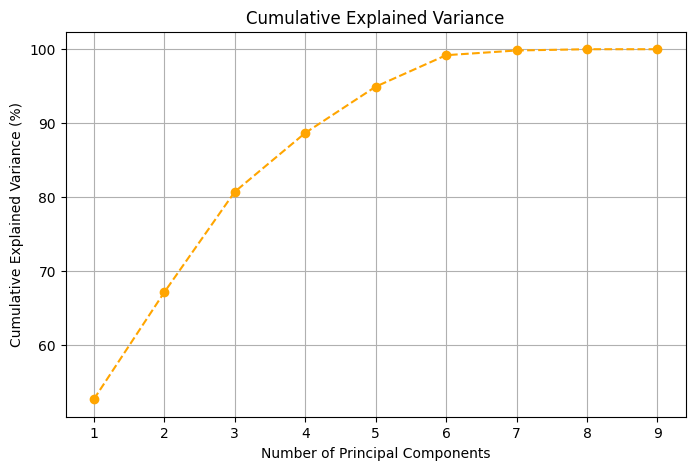

In [35]:
# Plot cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum() * 100
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()


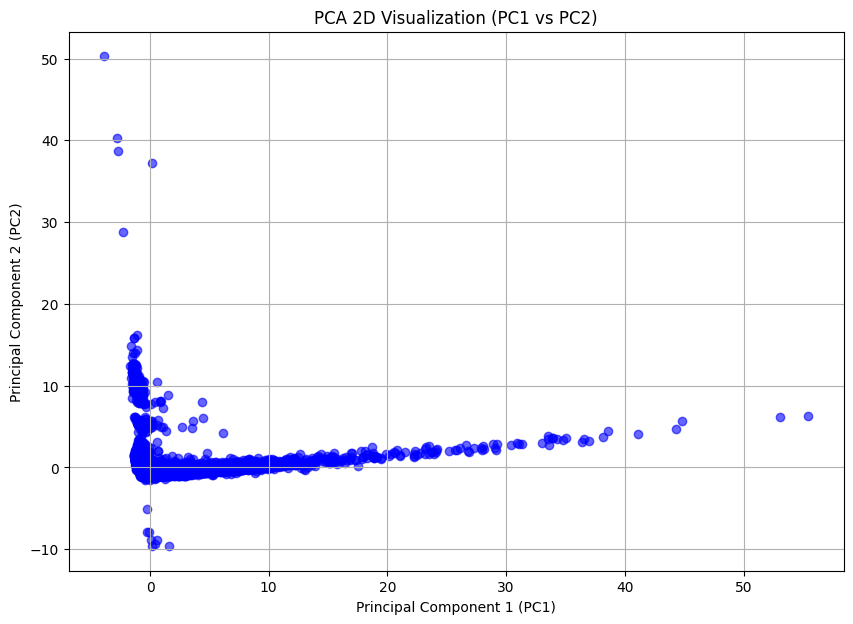

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(data_with_pca['PC1'], data_with_pca['PC2'], alpha=0.6, c='blue')
plt.title('PCA 2D Visualization (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid()
plt.show()


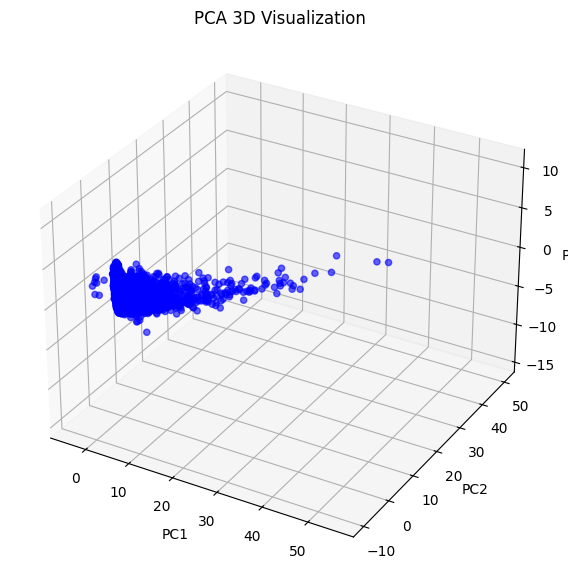

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_with_pca['PC1'], data_with_pca['PC2'], data_with_pca['PC3'], alpha=0.6, c='blue')
ax.set_title('PCA 3D Visualization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


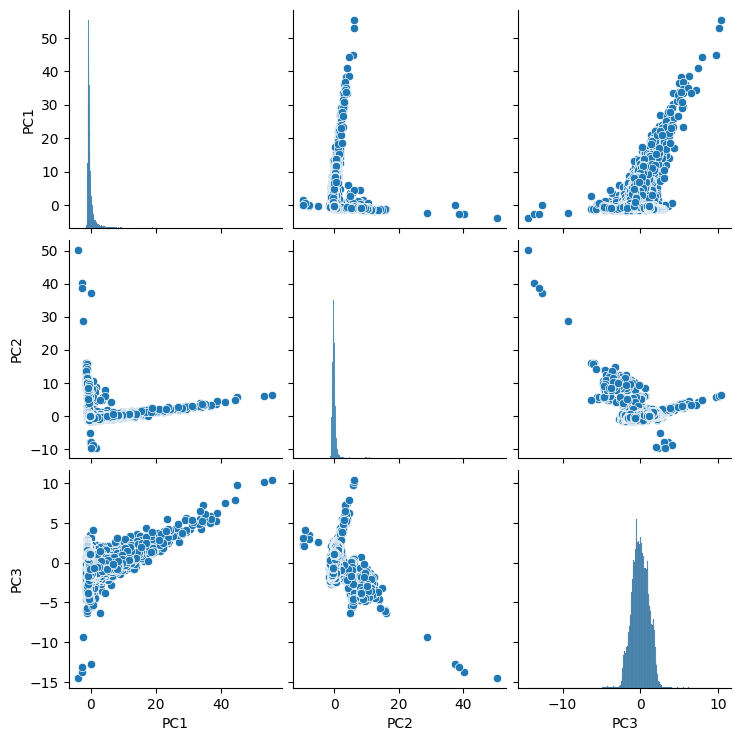

In [38]:
import seaborn as sns

# Pairplot of the first few principal components
sns.pairplot(data_with_pca[['PC1', 'PC2', 'PC3']])
plt.show()


**5. Outcomes of APC**

* Cluster Assignments:
Each point is labeled with a cluster.

* Exemplars:
The most representative points of each cluster.

* Number of Clusters:
Determined automatically based on the data and preference values.

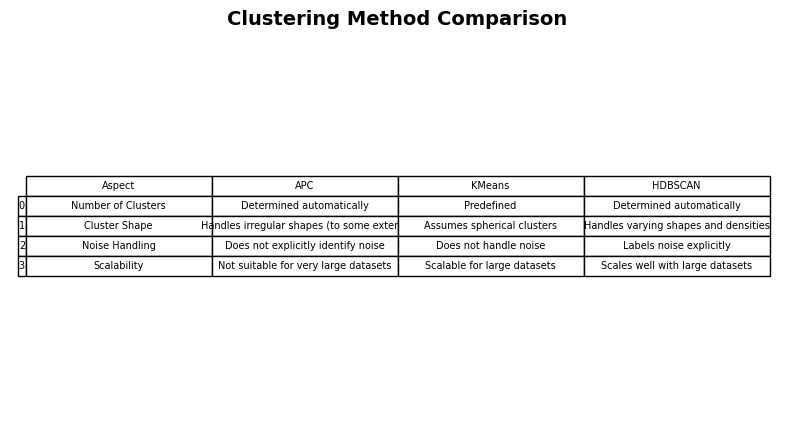

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Create a dictionary with comparison data
comparison_data = {
    "Aspect": [
        "Number of Clusters",
        "Cluster Shape",
        "Noise Handling",
        "Scalability",
    ],
    "APC": [
        "Determined automatically",
        "Handles irregular shapes (to some extent)",
        "Does not explicitly identify noise",
        "Not suitable for very large datasets",
    ],
    "KMeans": [
        "Predefined",
        "Assumes spherical clusters",
        "Does not handle noise",
        "Scalable for large datasets",
    ],
    "HDBSCAN": [
        "Determined automatically",
        "Handles varying shapes and densities",
        "Labels noise explicitly",
        "Scales well with large datasets",
    ],
}

# Convert the dictionary to a DataFrame
comparison_table = pd.DataFrame(comparison_data)

# Plot the table as an image
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
tbl = table(ax, comparison_table, loc='center', cellLoc='center', colWidths=[0.2] * len(comparison_table.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(7)
tbl.scale(1.2, 1.2)

plt.title("Clustering Method Comparison", fontsize=14, weight='bold')
plt.show()


### **1. Which method did you like the most?**
I liked **HDBSCAN** the most because it handles noise points effectively and can identify clusters of varying densities and shapes without needing to specify the number of clusters beforehand. This flexibility makes it particularly well-suited for geologic datasets, which often exhibit heterogeneous patterns.


### **2. Which method did you like the least?**
I liked **Affinity Propagation Clustering (APC)** the least because it is computationally expensive and sensitive to the `preference` parameter. While it determines the number of clusters automatically, the results are not as intuitive or robust as other methods for geologic datasets.

### **3. How did you score these unsupervised models?**
The models were scored using:
- **Silhouette Score**: Evaluates how well-separated the clusters are. A higher score indicates better-defined clusters.
- **Number of Clusters**: Ensures the output is meaningful (e.g., not too few or too many clusters).
- **Alignment with Domain Knowledge**: Checked whether the clusters made sense in the context of geology.

### **4. Did the output align with your geologic understanding?**
Partially. While **HDBSCAN** produced clusters that aligned well with expectations of varying densities (e.g., formations with different porosities), **KMeans** struggled with the irregular shapes of clusters and resulted in less geologically relevant groupings.


### **5. What did you want to learn more about?**
I wanted to learn more about:
- **Cluster Interpretability**: Linking cluster results with specific geologic features like lithology or depositional environments.
- **Advanced Preprocessing**: Methods to enhance clustering results, such as feature engineering or outlier removal tailored to geologic datasets.

### **6. Did you pre-process your data?**
Yes, the data was pre-processed by:
- Standardizing column names for consistency.
- Handling missing values (e.g., dropping columns with >50% missing data).
- Converting columns with mixed types to numeric where applicable.
- Scaling the data using `StandardScaler`.

### **7. What was a decision you were most unsure about?**
The most uncertain decision was choosing the **parameters for each clustering method**:
- For **HDBSCAN**, deciding the `min_cluster_size` required experimentation.
- For **APC**, determining an appropriate `preference` value was challenging due to its sensitivity.
- For **KMeans**, selecting the optimal number of clusters (`k`) using the elbow method was subjective and required validation against geologic knowledge.